# Random Forest Project 

Data Source: [LendingClub.com](https://www.lendingclub.com/info/download-data.action). 

Business Case: LendingClub offers investors access to the consumer credit asset class, which has historically been available only to banks and large institutions until recently.

Data dictionary:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Common Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read CSV

In [3]:
df = pd.read_csv('loan_data.csv')

## Basic data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [6]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

# Exploratory Data Analysis

Plotting credit policy overlapping histograms for FICO score. Following conslusions can be drawn:
1. We can see for a FICO of around 660 and less, credit policy is always 0 i.e. such customers are not considered eligible for loan
2. People having FICO score of 700 and above gradually declines. So lesser number of customers maintain good credit history
3. If FICO score is 740 and above then generally the loan applications are approved

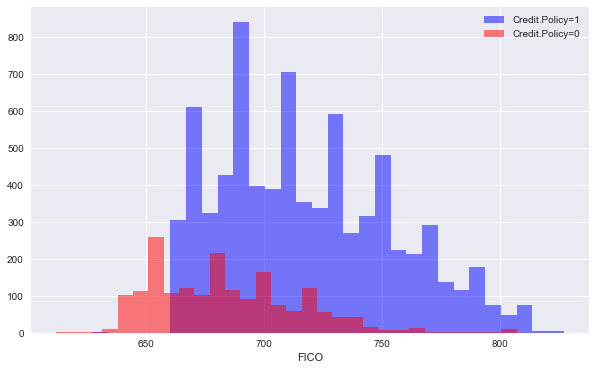

In [7]:
plt.figure(figsize=(10,6))
(df[df['credit.policy']==1]['fico']).hist(bins=30,color='B',alpha=0.5,label='Credit.Policy=1')
(df[df['credit.policy']==0]['fico']).hist(bins=30,color='R',alpha=0.5,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

## FICO analysis by not.fully.paid column

Some inferences from visualization:
1. Negligible bins under 640 as people generally dont get loan with low FICO scores
2. Bins height peaks at slightly under 700 FICO score and then gradually dips. Primary reasons would be that lesser number of people have high FICO scores

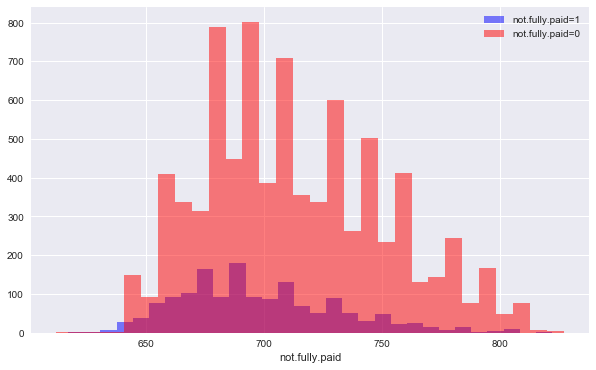

In [8]:
plt.figure(figsize=(10,6))
(df[df['not.fully.paid']==1]['fico']).hist(bins=30,color='B',alpha=0.5,label='not.fully.paid=1')
(df[df['not.fully.paid']==0]['fico']).hist(bins=30,color='R',alpha=0.5,label='not.fully.paid=0')
plt.legend()
plt.xlabel('not.fully.paid')

## Analyze Loan Purpose

In majority of cases the loan is taken for changing the lendor i.e. either in the form of debt consolidation or to repay credit-card debt. From the economy standpoint it is not a good indication as it shows that the larger group of people taking loans is not for any development or growth related purposes (either personal or community related).


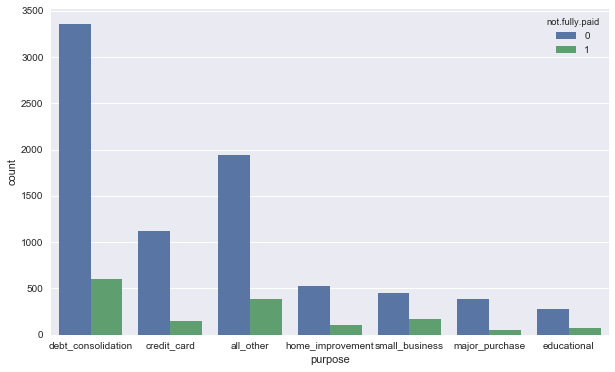

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

## FICO score and interest rate trends

It is cleary evident that people with higher FICO score are charged less interest due to their good credit history. 
The lender have more confidence in lending money to people with high FICO scores so they would be charging less interest.
On the other hand since lenders are taking more risk while lending money to people with lower FICO score so they charge more interest.

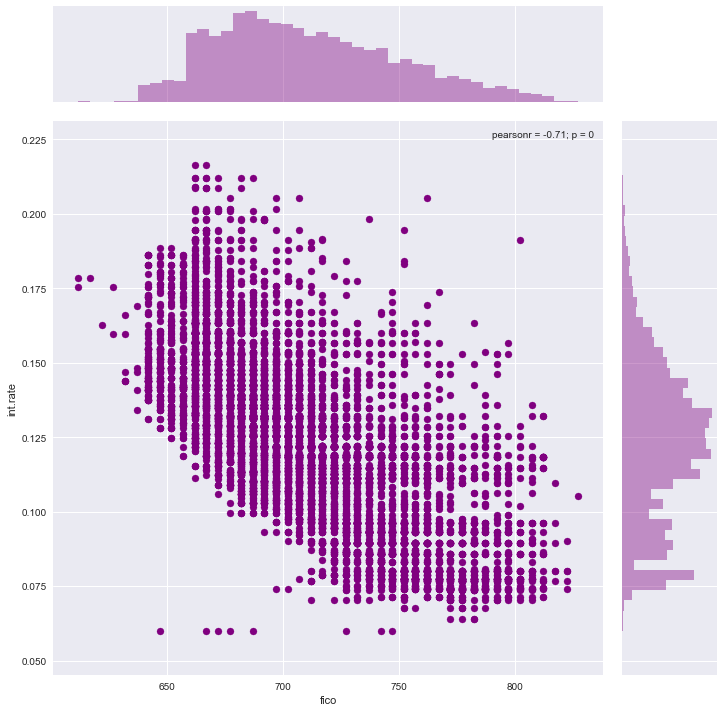

In [10]:
sns.jointplot(data=df,x='fico',y='int.rate',color='purple',size=10)

## not.fully.paid and credit.policy trend comparison.

The people who dont have outstanding loan i.e. not.fully.paid=0, have much denser credit.policy=1 as they are getting more loan approvals. Check the density of blue dots between the two charts

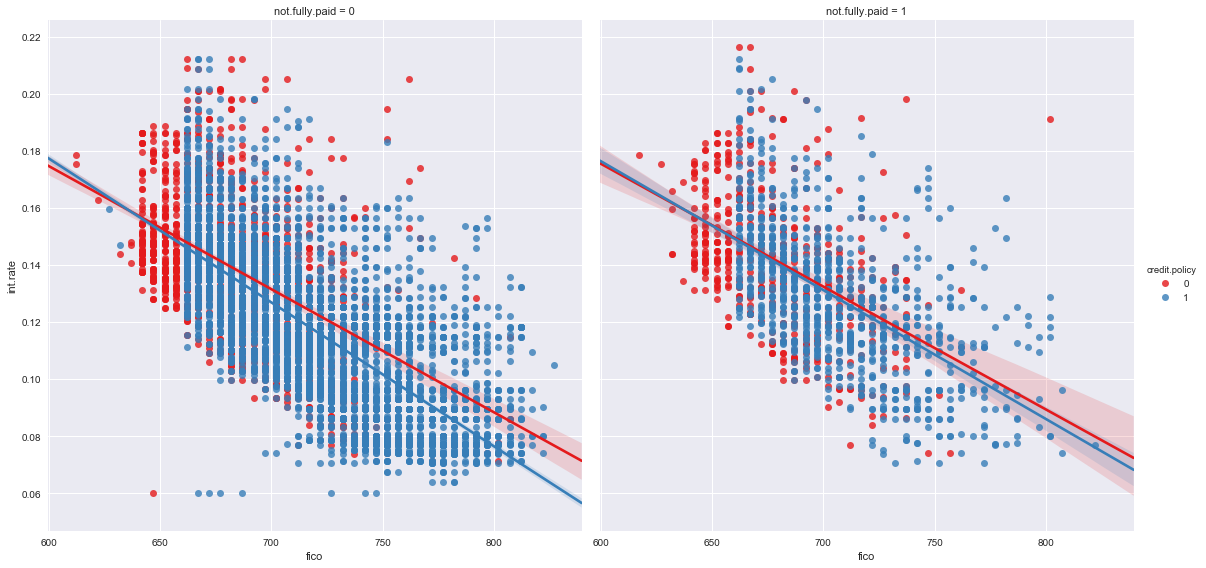

In [11]:
sns.lmplot(data=df, x="fico", y="int.rate", col="not.fully.paid", hue='credit.policy', size=8, palette='Set1')

# Data Setup

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Since the **purpose** column is categorical, transform it using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [13]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [14]:
purpose = pd.get_dummies(df['purpose'],drop_first=True)

In [15]:
df = pd.concat([df,purpose],axis=1)

In [16]:
df.drop('purpose',axis=1,inplace=True)

In [17]:
df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], test_size=0.30, 
                                                    random_state=101)

# Training a Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2431
          1       0.19      0.24      0.22       443

avg / total       0.75      0.73      0.74      2874



In [26]:
print(confusion_matrix(y_test,predictions))

[[1986  445]
 [ 336  107]]


## Tree Visualizations

It needs you to install pydot library and also download the Graphviz library. Include the bin folder of Graphviz download in your Path variable so that its exe's can be accessed from the Notebook.

** Note: ** You will need to restart your kernel for Path change to take effect.

In [27]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business']

In [28]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

You might yet the error "IOPub data rate exceeded." while plotting the tree. In such cases do the following steps:
- Go to your Jupyter notebook folder 
- Right-click the "Jupyter Notebook" launch icon
- Click on properties
- Copy the value of Target
- Open command prompt in the folder location
- Paste the Target value of launching Jupyter
- Add the following property before launching "--NotebookApp.iopub_data_rate_limit=10000000000"

# Training the Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=100)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

In [32]:
rfc_pred = rfc.predict(X_test)

In [33]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92      2431
          1       0.41      0.02      0.04       443

avg / total       0.78      0.84      0.78      2874



In [34]:
print(confusion_matrix(y_test,rfc_pred))

[[2418   13]
 [ 434    9]]


# Conclusion

Random Forest Model has performed better than the Decision Tree for Precision, Recall and the F1 Score as well.